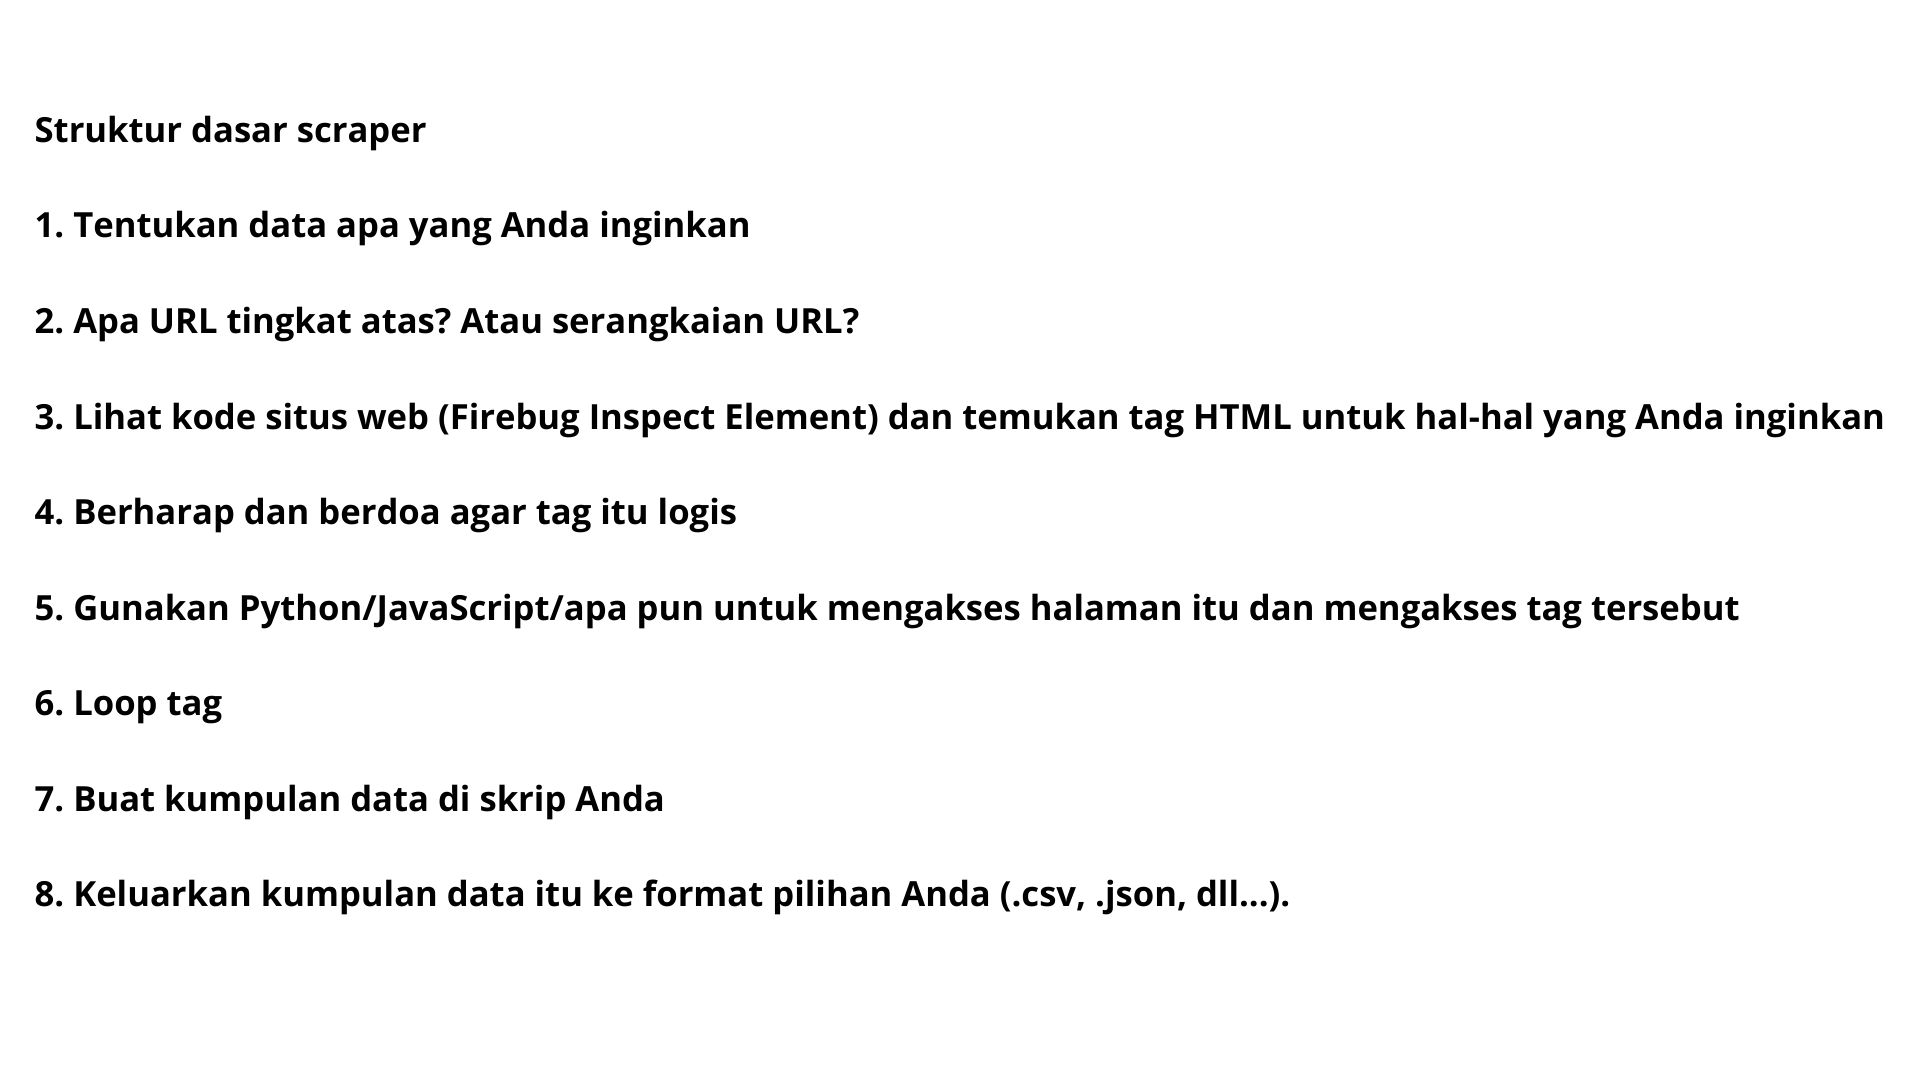

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
page = str(input("Page : "))

Page : 2


In [3]:
url = "https://indeks.kompas.com/?page="+page

In [4]:
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

In [8]:
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta content="index, follow" name="robots"/>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
})(window,document,'script','dataLayer','GTM-PT7PC4');</script>
<!-- End Google Tag Manager -->
<title>Indeks Berita All Halaman 2 - 13 Mei 2023 - Kompas.com</title>
<link href="//securepubads.g.doubleclick.net" rel="dns-prefetch"/>
<link href="//asset.kompas.com" rel="dns-prefetch"/>
<link href="//adsimg.kompas.com" rel="dns-prefetch"/>
<link href="//static.criteo.net" rel="dns-prefetch"/>
<link href="//bidder.criteo.com" rel="dns-prefetch"/>
<link href="//rtax.criteo.com" rel="dns-prefetch"/>
<link href="//tpc.googlesyndication.com" rel="dns-prefetch"/>
<link href="//cm.g.doubleclic

In [6]:
data_berita = pd.DataFrame()

In [9]:
for p in soup.find_all("div", {"class":"article__list clearfix"}):
    #Judul
    if str(p.find("h3")) != "None":
        title = p.find("h3").get_text().lower()
        # Cleansing
        title = title.replace("\n", "")
    # kategori
    if str(p.find("div", {"class":"article__list__info"})) != "None":
        kategori = p.find("div", {"class": "article__subtitle article__subtitle--inline"}).get_text().lower()
    # Tanggal 
    if str(p.find("div", {"class":"article__date"})) != "None":
        dates = p.find("div", {"class": "article__date"}).get_text()
        dates = dates.split(',')
        date = dates[0]
    # Waktu 
    if str(p.find("div", {"class":"article__date"})) != "None":
        dates = p.find("div", {"class": "article__date"}).get_text()
        dates = dates.split(',')
        timess = dates[1]
        times = timess.replace(" WIB", "")
    # Link 
    if str(p.find("h3")) != "None":
        link = p.find("a", {"class":"article__link"}).attrs['href']
    
    data_berita = data_berita.append({'Judul': title, 'Kategori': kategori, 'Tanggal Upload': date, 'Waktu Upload': times, 'Link': link}, ignore_index=True)

<ipython-input-9-45e52d9ddab8>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_berita = data_berita.append({'Judul': title, 'Kategori': kategori, 'Tanggal Upload': date, 'Waktu Upload': times, 'Link': link}, ignore_index=True)
<ipython-input-9-45e52d9ddab8>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_berita = data_berita.append({'Judul': title, 'Kategori': kategori, 'Tanggal Upload': date, 'Waktu Upload': times, 'Link': link}, ignore_index=True)
<ipython-input-9-45e52d9ddab8>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_berita = data_berita.append({'Judul': title, 'Kategori': kategori, 'Tanggal Upload': date, 'Waktu Upload': times, 'Link': link}, ignore_index=True)
<ipython-input-9-45e52d9ddab8>:

In [10]:
data_berita

,Judul,Kategori,Tanggal Upload,Waktu Upload,Link
0,"tempat makan hidden gem di jakarta timur, bubu...",food,13/05/2023,10:11,https://www.kompas.com/food/read/2023/05/13/10...
1,hacker spesialis ransomware klaim jadi dalang ...,tekno,13/05/2023,10:10,https://tekno.kompas.com/read/2023/05/13/10101...
2,"beasiswa al azhar mesir 2023 kemenag dibuka, s...",edukasi,13/05/2023,10:07,https://www.kompas.com/edu/read/2023/05/13/100...
3,"ayah tiri cabuli balita saat sedang tertidur, ...",regional,13/05/2023,10:05,https://regional.kompas.com/read/2023/05/13/10...
4,cerita jefri pandu wisata delegasi vietnam ke ...,regional,13/05/2023,10:03,https://regional.kompas.com/read/2023/05/13/10...
5,tanda-tanda power steering mobil minta jajan,otomotif,13/05/2023,10:02,https://otomotif.kompas.com/read/2023/05/13/10...
6,"cara kerja xylobands, gelang warna-warni yang ...",tekno,13/05/2023,10:01,https://tekno.kompas.com/read/2023/05/13/10010...
7,"cegah kambuh, 3 hal ini wajib dihindari pasien...",health,13/05/2023,10:01,https://health.kompas.com/read/23E13100100768/...
8,"4 fakta jelang indonesia vs vietnam, ujian kon...",bola,13/05/2023,10:00,https://bola.kompas.com/read/2023/05/13/100052...
9,"jalan aspal versus jalan beton, mana yang lebi...",properti,13/05/2023,10:00,https://www.kompas.com/properti/read/2023/05/1...


In [16]:
data_berita.to_excel('Hasil4.xlsx', index=False)